<div style="background: linear-gradient(90deg, #4b0082, #8000ff, #a64bf4); padding: 20px; border-radius: 12px; color: white; text-align: center; box-shadow: 0 4px 12px rgba(0,0,0,0.25); width: 90%; margin: auto;">
  <img src="https://github.com/wliaw/2025-AAI-Summit-GraphDB/blob/main/imgs/dd_logo_h_white.png?raw=true" alt="Datadog Logo" style="height: 70px; margin-bottom: 12px;">
  <h1 style="margin-bottom: 10px; font-size: 2.4em;">2025 Applied AI Summit</h1>
  <h2 style="margin-top: 0; font-weight: 300;">Introduction to Graph Databases for AI Applications</h2>
  <p style="margin-top: 15px; font-size: 1.1em; font-style: italic;">by William Liaw</p>
</div>


# 📌 What We'll Do

In this notebook, we'll explore the task of **Knowledge Graph Completion (KGC)** — the process of enriching a knowledge graph by predicting and filling in missing information (such as unseen relationships or entities).

A **knowledge graph** represents data as a network of entities (**nodes**) connected by relationships (**edges**). However, real-world knowledge graphs are often **incomplete**, with many potential connections missing. KGC aims to infer these missing links or facts by learning from existing patterns and structure in the graph.

### 🧠 In this notebook, we will:

-   **Query and explore graph data** using Neo4j and Cypher
-   **Infer missing links** using rule-based and embedding-based methods
-   **Learn graph representations** with graph neural networks (GNNs)
-   **Bridge graph data with LLMs** for enhanced reasoning and enrichment


# ✅ Recommended Setup

<div style="
  background-color: #fff0f0;
  color: #8b0000;
  border-left: 5px solid #ff4d4d;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin-bottom: 20px;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  ❌ <strong>Error:</strong> Unable to retrieve routing information when using NBT kernels.
  <br><br>
  This is a known issue when running Neo4j from within certain NBT kernels. To resolve it, we recommend setting up a **local** clean Python environment outside of NBT.
</div>

Create and activate a virtual environment:

```zsh
python3 -m venv aai-summit
source aai-summit/bin/activate
```

Upgrade pip:

```zsh
pip install --upgrade pip
```

Install required packages:

```zsh
pip install \
    neo4j graphdatascience \
    tqdm pandas jupyter ipykernel matplotlib seaborn numpy \
    torch torch_geometric \
    pykeen
```

This setup ensures full compatibility with Neo4j and the PyKEEN library used later in this notebook.


# 🗂️ Table of Contents

1. **Neo4j Basics**  
   Get hands-on with Neo4j and the Cypher query language to model and explore graph data.

2. **Embedding-Based Methods**  
   Learn how to represent entities and relationships as vectors for link prediction and knowledge graph completion.

3. **Graph Neural Networks (GNNs)**  
   Apply neural models that operate directly on graph structure to capture higher-order dependencies.

4. **Large Language Models (LLMs) + Graphs**  
   Explore how LLMs can enhance graph reasoning and how graphs can ground or structure LLM responses.


# 1. Neo4j Basics

To get started with this notebook, we'll use [Neo4j Sandbox](https://neo4j.com/sandbox/) — a free, cloud-hosted Neo4j environment perfect for experimentation.

**Neo4j** is a native graph database built to efficiently store and query data that is highly interconnected. Instead of traditional rows and tables, Neo4j uses a **property graph model**, where:

-   **Nodes** represent entities
-   **Relationships (edges)** represent connections between entities
-   **Properties** store key-value metadata on both nodes and relationships

This structure makes Neo4j ideal for applications like knowledge graphs, where the _relationships themselves_ are first-class citizens.

## 🚀 Getting Started with the Neo4j Sandbox

1. Visit the [Neo4j Sandbox](https://neo4j.com/sandbox/) and sign in (you may need to create a free account).
2. Click **New Project** and choose the **Fraud Detection** template.
3. Select **Create and Download credentials** — we’ll use them to connect from Python later on.

 <div style="text-align: center; margin: 16px 0;">
   <img src="https://github.com/wliaw/2025-AAI-Summit-GraphDB/blob/main/imgs/Fraud%20Detection.png?raw=true" alt="Neo4j Fraud Detection Sandbox" style="max-width: 600px; width: 100%; border-radius: 8px; box-shadow: 0 4px 12px rgba(0,0,0,0.15);">
   <p style="color: #555; font-size: 0.9em; margin-top: 8px;"><em>Neo4j Sandbox – Fraud Detection Project Setup</em></p>
 </div>

4. Once the environment is ready, click **Open** to access your **Neo4j Browser**.
5. Using `:server connect`, connect to your database by clicking **Sandbox Login**.

 <div style="text-align: center; margin: 16px 0;">
   <img src="https://github.com/wliaw/2025-AAI-Summit-GraphDB/blob/main/imgs/Sandbox%20Login.png?raw=true" alt="Neo4j Fraud Detection Sandbox" style="max-width: 600px; width: 100%; border-radius: 8px; box-shadow: 0 4px 12px rgba(0,0,0,0.15);">
   <p style="color: #555; font-size: 0.9em; margin-top: 8px;"><em>Neo4j Browser – Connecting to database</em></p>
 </div>

> **Note:** If you'd prefer a local setup (e.g., Docker), that's also possible — but the sandbox is the fastest way to follow along.

## 🌟 Key Features of Neo4j

-   **Native Graph Storage & Processing** – Optimized for graph workloads, not retrofitted from relational systems.
-   **Cypher Query Language** – A declarative and expressive query language tailored for graphs.
-   **High Performance at Scale** – Designed to handle large, complex networks of data.
-   **Graph Visualization Tools** – Built-in UI for exploring graph structures interactively.— we’ll use them to connect from Python.
-   **Flexible Integrations** – Connects easily to Python, Spark, BI tools, and more.


<div style="
  background-color: #f0f8ff;
  color: #004080;
  border-left: 5px solid #3399ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin-bottom: 20px;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  ℹ️ <strong>Info:</strong> Take a look at the <a href="https://neo4j.com/docs/graph-data-science/current/" target="_blank">Neo4j Graph Data Science Library Docs</a>.
</div>


## 📊 Preliminary Data Exploration

Let’s first take a quick look at the structure of the graph in our Neo4j instance.


<div style="
  background-color: #f0f8ff;
  color: #004080;
  border-left: 5px solid #3399ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin-bottom: 20px;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  ℹ️ <strong>Info:</strong> Use <code>CALL</code> in Cypher to execute built-in or user-defined procedures. 
  <br><br>
  These procedures can help you visualize the schema, get metadata, run graph algorithms, or manage the database.
</div>


### 🧭 Schema and Stats

To explore the overall graph schema — including node labels, relationship types, and their properties — run the following Cypher command in the Neo4j Browser:


```sql
CALL db.schema.visualization();
```


This will open an interactive schema graph showing:

-   Node labels (e.g., Person, Transaction, Account)
-   Relationship types (e.g., SENT_TO, OWNS, INVOLVED_IN)
-   Property keys for each entity or edge


<div style="
  background-color: #f7f2ff;
  color: #4b007d;
  border-left: 5px solid #8000ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin: 16px 0;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  📝 <strong>Quick Questions:</strong>  
  <br><br>
  <strong>How many node labels do you see?</strong><br>
  <strong>How many relationship types are present?</strong>
</div>


<div style="
  border: 1px dashed #8000ff;
  background-color: #fdfbff;
  padding: 14px 18px;
  border-radius: 6px;
  font-family: monospace;
  width: 85%;
  color: #333;
">
<strong>Write your answers below:</strong>
</div>


Node labels: $\dots$

Relationship types: $\dots$


**Answer:**

Node labels: $13$

Relationship types: $8$


To get deeper statistics about the graph, we can use the APOC utility procedure:


```sql
CALL apoc.meta.stats();
```


<div style="
  background-color: #f7f2ff;
  color: #4b007d;
  border-left: 5px solid #8000ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin: 16px 0;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  📝 <strong>Quick Question:</strong>  
  <br><br>
  <strong>Complete the cell below with key metadata about the graph.</strong>
</div>


<div style="
  border: 1px dashed #8000ff;
  background-color: #fdfbff;
  padding: 14px 18px;
  border-radius: 6px;
  font-family: monospace;
  width: 85%;
  color: #333;
">
<strong>Write your answers below:</strong>
</div>


| Metric              |  Value  |
| :------------------ | :-----: |
| Node Labels         | $\dots$ |
| Relationship Types  | $\dots$ |
| Property Keys       | $\dots$ |
| Total Nodes         | $\dots$ |
| Total Relationships | $\dots$ |


**Answer:**

| Metric              |   Value   |
| :------------------ | :-------: |
| Node Labels         |   $13$    |
| Relationship Types  |    $8$    |
| Property Keys       |   $10$    |
| Total Nodes         | $332,973$ |
| Total Relationships | $980,098$ |


These stats help us estimate query performance and understand the scale of the graph for downstream tasks like embedding or GNN modeling.


### 🔗 Nodes and Relationships

Let’s list all the **relationship types** in the graph along with how many times each one appears.


```sql
CALL db.relationshipTypes() YIELD relationshipType as type
CALL apoc.cypher.run('MATCH ()-[:`'+type+'`]->() RETURN count(*) as count', {})
YIELD value
RETURN type AS Relationship, value.count AS Count
```


<div style="
  background-color: #f7f2ff;
  color: #4b007d;
  border-left: 5px solid #8000ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin: 16px 0;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  📝 <strong>Quick Question:</strong>  
  <br><br>
  <strong>Try to list all labels and their corresponding counts.</strong><br><br>
  💡 <em>Hint:</em> In Cypher, the pattern <code>()-[]-&gt;()</code> means “any node connected to any node via any relationship in the forward direction.”<br>
  You can think of it like a generic arrow between two nodes! Therefore, to get information about a node's label, you will need to modify <code>()-[:`'+type+'`]->()</code>.
</div>


<div style="
  border: 1px dashed #8000ff;
  background-color: #fdfbff;
  padding: 14px 18px;
  border-radius: 6px;
  font-family: monospace;
  width: 85%;
  color: #333;
">
<strong>Write your answer below:</strong>
<code></code>
</div>


**Answer:**

```sql
CALL db.labels() YIELD label
CALL apoc.cypher.run('MATCH (:`'+label+'`) RETURN count(*) as count', {})
YIELD value
RETURN label as Label, value.count AS Count
```


## 🔍 First-Party Fraud Detection

In this section, we’ll look for potential **first-party fraud** using **entity link analysis** — connecting people based on shared personal information.

This dataset includes three types of **personally identifiable information (PII)**:

-   SSN
-   Email
-   Phone Number

### 🧠 Hypothesis

If multiple clients **share the same PII**, they might be connected — and that can be a red flag for **synthetic identities** or **fraud rings**.

But not all shared identifiers are suspicious (e.g., family members sharing a phone number). So instead of flagging every case, we'll:

-   Score clients based on how many PII links they have
-   Label the top **X percentile** as potential fraudsters

Let’s see how that looks in the graph!


### 🔗 Identify Clients Sharing PII


This query returns all unique pairs of clients who share one or more pieces of PII, sorted by how many they share:


```sql
MATCH (c1:Client)-[:HAS_EMAIL|HAS_PHONE|HAS_SSN]->(n)<-[:HAS_EMAIL|HAS_PHONE|HAS_SSN]-(c2:Client)
WHERE elementId(c1) < elementId(c2)
RETURN c1.id, c2.id, count(*) AS freq
ORDER BY freq DESC;
```


This query tells us how many unique clients are involved in at least one shared PII connection:


```sql
MATCH (c1:Client)-[:HAS_EMAIL|HAS_PHONE|HAS_SSN]->(n)<-[:HAS_EMAIL|HAS_PHONE|HAS_SSN]-(c2:Client)
WHERE elementId(c1) <> elementId(c2)
RETURN count(DISTINCT c1.id) AS freq;
```


<div style="
  background-color: #f7f2ff;
  color: #4b007d;
  border-left: 5px solid #8000ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin: 16px 0;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  📝 <strong>Quick Question:</strong>  
  <br><br>
  <strong>Why the use of <code><></code> instead of <code><</code> or <code>></code> here?.</strong>
</div>


<div style="
  border: 1px dashed #8000ff;
  background-color: #fdfbff;
  padding: 14px 18px;
  border-radius: 6px;
  font-family: monospace;
  width: 85%;
  color: #333;
">
<strong>Write your answer below:</strong>
<code></code>
</div>


**Answer:**

Using `<` or `>` introduces an ordering constraint between the nodes — for example, only matching cases where `A` comes before `B` based on internal IDs. This means that the reverse (`B` matched to `A`) would be excluded.

In contrast, `<>` simply checks for inequality, ensuring that the two nodes are not the same, while allowing both directions of the match (e.g., `A–>n<–B` and `B–>n<–A`) to be included.


### ➕ Create a New Relationship: `:SHARED_IDENTIFIERS`

To make analysis easier, we’ll add a direct relationship between clients who share PII — labeled as `:SHARED_IDENTIFIERS`. This captures the number of shared identifiers as a property on the relationship.


```sql
MATCH (c1:Client)-[:HAS_EMAIL|HAS_PHONE|HAS_SSN]->(n)<-[:HAS_EMAIL|HAS_PHONE|HAS_SSN]-(c2:Client)
WHERE elementId(c1) < elementId(c2)
WITH c1, c2, count(*) AS cnt
MERGE (c1)-[:SHARED_IDENTIFIERS {count: cnt}]->(c2);
```


<div style="
  background-color: #f0f8ff;
  color: #004080;
  border-left: 5px solid #3399ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin-bottom: 20px;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  ℹ️ <strong>Info:</strong> In case something goes wrong, you can use: <code>MATCH ()-[r:SHARED_IDENTIFIERS]->() DELETE r;</code> to delete <code>:SHARED_IDENTIFIERS</code>.
</div>


This creates a new relationship between each client pair that shares at least one identifier, and stores how many identifiers they share in the count property. Let's visualize a sample:


```sql
MATCH p = (:Client)-[s:SHARED_IDENTIFIERS]->(:Client)
WHERE s.count >= 2
RETURN p
LIMIT 25;
```


<div style="
  background-color: #f7f2ff;
  color: #4b007d;
  border-left: 5px solid #8000ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin: 16px 0;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  📝 <strong>(Trick) Quick Question:</strong>  
  <br><br>
  <strong>Notice something <em>weird</em>?</strong><br><br>
    💡 <em>Hint:</em> Try to explain to a friend the meaning of the directed relation <code>:SHARED_IDENTIFIERS</code>.
</div>


<div style="
  border: 1px dashed #8000ff;
  background-color: #fdfbff;
  padding: 14px 18px;
  border-radius: 6px;
  font-family: monospace;
  width: 85%;
  color: #333;
">
<strong>Write your answer below:</strong>
<code></code>
</div>


**Answer:**

Relationships in Neo4j are _always directed_, so even a conceptually symmetric relation like `:SHARED_IDENTIFIERS` must have a direction — which could introduce redundancy if we didn't constraint the ordering with `elementId(c1) < elementId(c2)`. In embedding models like TransE, symmetric relations are modeled with relation vectors close to zero (i.e., $\vec{r} \approx 0$) to satisfy $\vec{h} + \vec{r} \approx \vec{t}$ and $\vec{t} + \vec{r} \approx \vec{h}$, which could pose some issues.


### 👾 Graph Algorithms for Fraud Detection

To uncover suspicious client behavior and detect potential fraud rings, we’ll build a workflow using a series of **graph algorithms** from Neo4j’s Graph Data Science (GDS) library.


#### 1. Identify Fraud Rings with WCC

Before we can run algorithms, we need to **project the relevant subgraph into memory**. This step defines what part of the property graph should be included and how it should be represented in the algorithm runtime.

<div style="
  background-color: #f0f8ff;
  color: #004080;
  border-left: 5px solid #3399ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin-bottom: 20px;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  ℹ️ <strong>Info:</strong> In Neo4j GDS, an <strong>in-memory graph</strong> is used for fast computation. It is separate from the persistent database and must be explicitly created (projected) before running algorithms.
</div>


```sql
CALL gds.graph.project(
  'wcc',
  {
    Client: {
      label: 'Client'
    }
  },
  {
    SHARED_IDENTIFIERS: {
      type: 'SHARED_IDENTIFIERS',
      orientation: 'UNDIRECTED',
      properties: {
        count: {
          property: 'count'
        }
      }
    }
  }
)
YIELD graphName, nodeCount, relationshipCount, projectMillis;
```


<div style="
  background-color: #f0f8ff;
  color: #004080;
  border-left: 5px solid #3399ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin-bottom: 20px;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  ℹ️ <strong>Info:</strong> In case something goes wrong, you can use <code>CALL gds.graph.drop('wcc') YIELD graphName;</code> to release <code>wcc</code> from memory.
</div>


This projects a graph named `wcc` containing Client nodes and `:SHARED_IDENTIFIERS` relationships, preserving the count property and **treating edges as undirected** (which **does not mean the edges are** undirected).

<div style="
  background-color: #f0f8ff;
  color: #004080;
  border-left: 5px solid #3399ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin-bottom: 20px;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  ℹ️ <strong>Info:</strong> GDS algorithms support four common execution modes: stream, mutate, write and stats.<br><br>
  📘 Read more: <a href="https://neo4j.com/docs/graph-data-science/2.0-preview/common-usage/running-algos/" target="_blank">Execution modes</a> More informaton here: .
</div>

<div style="
  background-color: #fffbe6;
  color: #8a6d3b;
  border-left: 5px solid #ffcc00;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin: 16px 0;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  ⚠️ <strong>Tip: Run a Memory Estimate First</strong><br><br>
  It's a good practice to run a memory estimate before projecting a graph, especially with large datasets. This helps prevent memory-related errors during processing.<br><br>
  📘 Read more: <a href="https://neo4j.com/docs/graph-data-science/current/common-usage/memory-estimation/" target="_blank">Memory Estimation Guide</a>; <a href="https://neo4j.com/docs/graph-data-science/current/algorithms/wcc/" target="_blank">Weakly Connected Components</a>.
</div>


To write results to the database, execute:


```sql
CALL gds.wcc.stream('wcc',
    {
        nodeLabels: ['Client'],
        relationshipTypes: ['SHARED_IDENTIFIERS'],
        consecutiveIds: true
    }
)
YIELD componentId, nodeId
WITH componentId AS cluster, gds.util.asNode(nodeId) AS client
WITH cluster, collect(client.id) AS clients
WITH cluster, clients, size(clients) AS clusterSize WHERE clusterSize > 1
UNWIND clients AS client
MATCH (c:Client) WHERE c.id = client
SET c.firstPartyFraudGroup=cluster;
```


We can then browse and visualize clusters with greater than 9 nodes:

```sql
MATCH (c:Client)
WITH c.firstPartyFraudGroup AS fpGroupID, collect(c.id) AS fGroup
WITH *, size(fGroup) AS groupSize WHERE groupSize >= 9
WITH collect(fpGroupID) AS fraudRings
MATCH p=(c:Client)-[:HAS_SSN|HAS_EMAIL|HAS_PHONE]->()
WHERE c.firstPartyFraudGroup IN fraudRings
RETURN p
```


#### 2. Compute Similarity Scores

We use node similarity algorithm to find similar nodes based on the relationships to other nodes. Two nodes are considered similar if they share _many of the same neighbors_. Node similarity uses Jaccard metric ([Node Similarity](https://neo4j.com/docs/graph-data-science/current/algorithms/node-similarity/#algorithms-node-similarity)).

$$
J(A, B) = \frac{|A \cap B|}{|A \cup B|} = \frac{|A \cap B|}{|A| + |B| - |A \cap B|}
$$

Node similarity algorithms work on bipartite graphs (two types of nodes and relationships between them). Here we project client nodes (one type) and three identifiers nodes (that are considered as second type) into memory.


```sql
MATCH (c:Client)-[:HAS_SSN|HAS_EMAIL|HAS_PHONE]->(id:Email|Phone|SSN)
WHERE c.firstPartyFraudGroup IS NOT NULL
WITH gds.graph.project('similarity', c, id) AS g
RETURN g.graphName, g.nodeCount, g.relationshipCount, g.projectMillis;
```


To write to the in-memory graph, execute:


```sql
CALL gds.nodeSimilarity.mutate('similarity',
    {
        topK:15,
        mutateProperty: 'jaccardScore',
        mutateRelationshipType:'SIMILAR_TO'
    }
);
```


<div style="
  background-color: #f0f8ff;
  color: #004080;
  border-left: 5px solid #3399ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin-bottom: 20px;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  ℹ️ <strong>Info:</strong> <code>topK</code> limits on the number of scores per node. The K largest results are returned.
</div>


To write from in-memory graph to the Database, execute:


```sql
CALL gds.graph.relationship.write('similarity', 'SIMILAR_TO', 'jaccardScore')
```


<div style="
  background-color: #f7f2ff;
  color: #4b007d;
  border-left: 5px solid #8000ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin: 16px 0;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  📝 <strong>Quick Question:</strong>  
  <br><br>
  <strong>How can we visualize a sample of the nodes with the newly added relationship <code>:SIMILAR_TO</code>?</strong>
</div>


<div style="
  border: 1px dashed #8000ff;
  background-color: #fdfbff;
  padding: 14px 18px;
  border-radius: 6px;
  font-family: monospace;
  width: 85%;
  color: #333;
">
<strong>Write your answer below:</strong>
<code></code>
</div>


**Answer:**

```sql
MATCH p = (:Client)-[s:SIMILAR_TO]->(:Client)
RETURN p
LIMIT 25;
```


#### 3. Calculate First-party Fraud Score

We now compute a **first-party fraud score** for each client using the **Weighted Degree Centrality** algorithm.

This score is based on the number and strength of a client’s `SIMILAR_TO` relationships — created earlier using Node Similarity with Jaccard scores.

**How it works:**

-   For each client node, we sum the `jaccardScore` values from all incoming `SIMILAR_TO` relationships.
-   This total is assigned as the `firstPartyFraudScore`.
-   A higher score means the client shares identifiers with many others in the cluster, or with high similarity — both of which can indicate suspicious behavior.

> In short: **The more similar a client is to others (based on shared PII), the more suspicious they may be.**


To write the centrality scores as `firstPartyFraudScore`, execute:


```sql
CALL gds.degree.write('similarity',
    {
        nodeLabels: ['*'],
        relationshipTypes: ['SIMILAR_TO'],
        relationshipWeightProperty: 'jaccardScore',
        writeProperty: 'firstPartyFraudScore'
    }
);
```


<div style="
  background-color: #f0f8ff;
  color: #004080;
  border-left: 5px solid #3399ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin-bottom: 20px;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  ℹ️ <strong>Info:</strong> In case something goes wrong, you can use: <code>MATCH (n) REMOVE n.firstPartyFraudScore;</code> to delete the property <code>firstPartyFraudScore</code>.
</div>


#### 4. Label High-Risk Clients as First-Party Fraudsters

Now that we’ve computed a `firstPartyFraudScore` for each client, we’ll label the **most suspicious clients** as potential fraudsters.

We do this by:

-   Calculating a threshold based on the **95th percentile** of all fraud scores.
-   Tagging clients whose score exceeds this threshold with a new label: `:FirstPartyFraudster`.

This helps isolate the top X% of clients most likely to be involved in **first-party fraud**.


```sql
MATCH (c:Client)
WHERE c.firstPartyFraudScore IS NOT NULL
WITH percentileCont(c.firstPartyFraudScore, 0.5) AS firstPartyFraudThreshold

MATCH (c:Client)
WHERE c.firstPartyFraudScore > firstPartyFraudThreshold
SET c:FirstPartyFraudster;
```


> 🎯 You can adjust the percentile (e.g., 90, 99) based on how aggressive or conservative your fraud detection strategy should be.


<div style="
  background-color: #f7f2ff;
  color: #4b007d;
  border-left: 5px solid #8000ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin: 16px 0;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  📝 <strong>Quick Question:</strong>  
  <br><br>
  <strong>How can we visualize a sample of your nodes with the newly added relationship <code>:FirstPartyFraudster</code>?</strong>
</div>


<div style="
  border: 1px dashed #8000ff;
  background-color: #fdfbff;
  padding: 14px 18px;
  border-radius: 6px;
  font-family: monospace;
  width: 85%;
  color: #333;
">
<strong>Write your answer below:</strong>
<code></code>
</div>


**Answer:**

```sql
MATCH p = (:Client)-[s:FirstPartyFraudster]->(:Client)
RETURN p
LIMIT 25;
```


<div style="
  background-color: #f0f8ff;
  color: #004080;
  border-left: 5px solid #3399ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin-bottom: 20px;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  ℹ️ <strong>Info:</strong> In case something goes wrong, you can use: <code>MATCH (n:FirstPartyFraudster) REMOVE n:FirstPartyFraudster</code> to delete the property <code>firstPartyFraudScore</code>.
</div>


## 🫏 Money Mules: Second-Party Fraud Detection

**Module 2: Detecting Clients Who Support First-Party Fraudsters**

According to the FBI, criminals often recruit **money mules** to help launder funds from scams or fraud. These individuals add layers of distance between the fraudster and the stolen funds, making it harder to trace the money trail.

In this module, we'll identify potential **second-party fraud suspects** — clients who transact with known first-party fraudsters — using graph patterns and algorithms.


### 🔍 Hypothesis

Clients who **send or receive money from first-party fraudsters** may be helping to move fraudulent funds and should be considered **second-party fraud suspects**.


### 🔗 Find all transactions involving first-party fraudsters and other clients

<div style="
  background-color: #f7f2ff;
  color: #4b007d;
  border-left: 5px solid #8000ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin: 16px 0;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  📝 <strong>Quick Questions:</strong>  
  <br><br>
  <strong>Find out clients who weren’t identified as first party fraudsters but they transact with first party fraudsters.</strong><br>
  <strong>Find out what types of transactions do these Clients perform with first party fraudsters.</strong>
</div>


<div style="
  border: 1px dashed #8000ff;
  background-color: #fdfbff;
  padding: 14px 18px;
  border-radius: 6px;
  font-family: monospace;
  width: 85%;
  color: #333;
">
<strong>Write your answers below:</strong>
<code></code>
</div>


**Answer:**

```sql
MATCH p = (:Client:FirstPartyFraudster)-[]-(:Transaction)-[]-(c:Client)
WHERE NOT c:FirstPartyFraudster
RETURN p;
```


**Answer:**

```sql
MATCH (:Client:FirstPartyFraudster)-[]-(txn:Transaction)-[]-(c:Client)
WHERE NOT c:FirstPartyFraudster
UNWIND labels(txn) AS transactionType
RETURN transactionType, count(*) AS freq;
```


### ➕ Create a New Relationship: `:TRANSFER_TO`

We’ll create new `:TRANSFER_TO` relationships based on transaction direction and volume, and label the involved clients as SecondPartyFraudSuspect.

➡️ From Fraudster to Client


```sql
MATCH (c1:FirstPartyFraudster)-[]->(t:Transaction)-[]->(c2:Client)
WHERE NOT c2:FirstPartyFraudster
WITH c1, c2, sum(t.amount) AS totalAmount
SET c2:SecondPartyFraudSuspect
CREATE (c1)-[:TRANSFER_TO {amount: totalAmount}]->(c2);
```


⬅️ From Client to Fraudster


```sql
MATCH (c1:FirstPartyFraudster)<-[]-(t:Transaction)<-[]-(c2:Client)
WHERE NOT c2:FirstPartyFraudster
WITH c1, c2, sum(t.amount) AS totalAmount
SET c2:SecondPartyFraudSuspect
CREATE (c1)<-[:TRANSFER_TO {amount: totalAmount}]-(c2);
```


<div style="
  background-color: #f7f2ff;
  color: #4b007d;
  border-left: 5px solid #8000ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin: 16px 0;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  📝 <strong>Quick Question:</strong>  
  <br><br>
  <strong>How can we visualize transfers to/from first-party fraudsters?</strong>
  <br><br>
  💡 <em>Hint:</em> In Cypher, we can use <code>()-[r]-()</code> to match both senses of a given relationship.
</div>


<div style="
  border: 1px dashed #8000ff;
  background-color: #fdfbff;
  padding: 14px 18px;
  border-radius: 6px;
  font-family: monospace;
  width: 85%;
  color: #333;
">
<strong>Write your answer below:</strong>
<code></code>
</div>


**Answer:**

```sql
MATCH p = (:Client:FirstPartyFraudster)-[:TRANSFER_TO]-(c:Client)
WHERE NOT c:FirstPartyFraudster
RETURN p;
```


### 🔎 Second-Party Fraud Detection Workflow

Our goal is to identify clients who may be supporting fraud without directly committing it.


#### 1. Project a Graph for Analysis

We’ll project a subgraph using Client nodes and TRANSFER_TO relationships (with amount as weight).


```sql
CALL gds.graph.project(
  'SecondPartyFraudNetwork',
  'Client',
  'TRANSFER_TO',
  {relationshipProperties: 'amount'}
);
```


#### 2. Detect Fraud Clusters with WCC

Use Weakly Connected Components to find clusters of connected clients.


```sql
CALL gds.wcc.stream('SecondPartyFraudNetwork')
YIELD nodeId, componentId
WITH gds.util.asNode(nodeId) AS client, componentId AS clusterId
WITH clusterId, collect(client.id) AS cluster
WITH clusterId, size(cluster) AS clusterSize, cluster
WHERE clusterSize > 1
UNWIND cluster AS client
MATCH (c:Client {id: client})
SET c.secondPartyFraudGroup = clusterId;
```


This helps identify groups of clients linked together by transactions, which may represent coordinated money movement networks.


#### 3. Compute PageRank for Fraud Influence Score

Run PageRank on the graph to rank clients based on the volume of money flowing to/from fraudsters.


```sql
CALL gds.pageRank.stream('SecondPartyFraudNetwork', {relationshipWeightProperty: 'amount'})
YIELD nodeId, score
WITH gds.util.asNode(nodeId) AS client, score AS pageRankScore
WHERE client.secondPartyFraudGroup IS NOT NULL
  AND pageRankScore > 0
  AND NOT client:FirstPartyFraudster
MATCH (c:Client {id: client.id})
SET c.secondPartyFraudScore = pageRankScore;
```


<div style="
  background-color: #f7f2ff;
  color: #4b007d;
  border-left: 5px solid #8000ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin: 16px 0;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  📝 <strong>Quick Question:</strong>  
  <br><br>
  <strong>How can we visualize second-party fraud network?</strong>
</div>


<div style="
  border: 1px dashed #8000ff;
  background-color: #fdfbff;
  padding: 14px 18px;
  border-radius: 6px;
  font-family: monospace;
  width: 85%;
  color: #333;
">
<strong>Write your answer below:</strong>
<code></code>
</div>


**Answer:**

```sql
MATCH p = (:Client:FirstPartyFraudster)-[:TRANSFER_TO]-(c:Client)
WHERE NOT c:FirstPartyFraudster
RETURN p;
```


## 🧹 Clean Up In-Memory Graphs

Always clean up projected graphs once you’re done to free memory:


```sql
CALL gds.graph.list()
YIELD graphName AS namedGraph
WITH namedGraph
CALL gds.graph.drop(namedGraph)
YIELD graphName
RETURN graphName;
```


# 2. Knowledge Graph Embedding-Based Methods

This section of the notebook demonstrates how to perform knowledge graph completion, focusing on multi-class link prediction. Unlike standard link prediction, which predicts the existence of a link, multi-class link prediction also classifies the type of relationship between entities.

To apply this method, the knowledge graph must contain multiple relationship types. If the graph has only one type of relationship, standard [link prediction techniques](https://towardsdatascience.com/a-deep-dive-into-neo4j-link-prediction-pipeline-and-fastrp-embedding-algorithm-bf244aeed50d) or alternative approaches that do not require relationship classification may be more suitable.

For multi-class link prediction, we employ knowledge graph embedding models rather than traditional node embedding models. The key distinction lies in their scope:

-   Node embedding models generate embeddings solely for nodes.
-   Knowledge graph embedding models create embeddings for both nodes and relationships.

In knowledge graph embedding, the conventional notation is:

-   $h$ – head (starting node)
-   $r$ – relationship (edge)
-   $t$ – tail (target node)

The core idea is that if a relationship exists between nodes, the embedding of the head node ($h$) plus the embedding of the relationship ($r$) should approximate the embedding of the tail node ($t$): $h + r \approx t$

Prediction follows intuitively from this principle. To infer new relationships for a node, sum the node's embedding with the embedding of a candidate relationship, then evaluate which nodes are closest to the result in the embedding space.

[PyKEEN](https://pykeen.readthedocs.io/en/stable/index.html) (Python Knowledge Embedding Engine) is an open-source Python library for training and evaluating knowledge graph embedding (KGE) models. It simplifies the application of machine learning to knowledge graphs by providing pre-implemented models, training pipelines, and evaluation tools.


<div style="
  background-color: #f0f8ff;
  color: #004080;
  border-left: 5px solid #3399ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin-bottom: 20px;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  ℹ️ <strong>Info:</strong> Take a look at the <a href="https://neo4j.com/docs/python-manual/current/" target="_blank">Neo4j Python Driver Docs</a>.
</div>


### Imports


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from neo4j import GraphDatabase, basic_auth
from pykeen import predict
from pykeen.pipeline import pipeline
from pykeen.triples import TriplesFactory
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

### Hyperparameter definitions


The next cell establishes a connection to the Neo4j database.


<div style="
  background-color: #f7f2ff;
  color: #4b007d;
  border-left: 5px solid #8000ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin: 16px 0;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  📝 <strong>TODO:</strong>  
  <br><br>
  <strong>Complete the cell below with your credentials for authentification to your Neo4j database.</strong><br><br>
  💡 <em>Hint:</em>If you can't find your downloaded credentials, you could also look for them within the Neo4j Sandbox. They should look something like this:<br><br>
  <div style="text-align: center; margin: 16px 0;">
    <img src="https://github.com/wliaw/2025-AAI-Summit-GraphDB/blob/main/imgs/Connecting Via Drivers.png?raw=true" alt="Neo4j Connecting Via Drivers" style="max-width: 600px; width: 100%; border-radius: 8px; box-shadow: 0 4px 12px rgba(0,0,0,0.15);">
    <p style="color: #555; font-size: 0.9em; margin-top: 8px;"><em>Neo4j Sandbox – Connecting Via Drivers</em></p>
  </div>
</div>


In [2]:
# host = ...  # TODO
# user = ...  # TODO
# password = ...  # TODO
# driver = GraphDatabase.driver(host, auth=basic_auth(user, password))

In [3]:
host = "bolt://3.83.152.156:7687"
user = "neo4j"
password = "feather-deal-sterilizers"
driver = GraphDatabase.driver(host, auth=basic_auth(user, password))

<div style="
  background-color: #f0f8ff;
  color: #004080;
  border-left: 5px solid #3399ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin-bottom: 20px;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  ℹ️ <strong>Info:</strong> In case connecting to Neo4j goes wrong, one could always use the Sandbox to connect to the database, perform queries, download data...
</div>


### Auxiliary functions


The `run_query` function executes a Cypher query and returns the results as a Pandas DataFrame.


In [4]:
def run_query(query, params={}):
    with driver.session() as session:
        result = session.run(query, params)
        return pd.DataFrame([r.values() for r in result], columns=result.keys())

### Data import & analysis

First, we will convert the Neo4j graph into a PyKEEN-compatible format and split the data into training and testing sets.


<div style="
  background-color: #f7f2ff;
  color: #4b007d;
  border-left: 5px solid #8000ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin: 16px 0;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  📝 <strong>Quick Question:</strong>  
  <br><br>
  <strong>How can we extract all fraud-related triples (e.g., shared identifiers, similarity, and transfers between fraudulent clients) for graph visualization in Python?</strong><br><br>
  💡 <em>Hint:</em> In Cypher, use the function <code>elementId(n)</code> to get a node's ID. You should get a <code>pd.DataFrame</code> with the columns: source, target, type (of their relationship).
</div>


<div style="
  border: 1px dashed #8000ff;
  background-color: #fdfbff;
  padding: 14px 18px;
  border-radius: 6px;
  font-family: monospace;
  width: 85%;
  color: #333;
">
<strong>Write your answer below:</strong>
<code></code>
</div>


In [5]:
# data = run_query(
#     """
#     MATCH (s:Client)-[r:<TODO>]->(t)
#     RETURN elementId(s) as source, elementId(t) AS target, type(r) as type
#     """
# )
# data

**Answer:**


In [6]:
data = run_query(
    """
    MATCH (s:Client)-[r:HAS_EMAIL|HAS_PHONE|HAS_SSN|SHARED_IDENTIFIERS|SIMILAR_TO|TRANSFER_TO]->(t)
    RETURN elementId(s) as source, elementId(t) AS target, type(r) as type
    """
)
data

,source,target,type
0,4:a86637d1-a510-4629-9a21-54d6f5d853c7:0,4:a86637d1-a510-4629-9a21-54d6f5d853c7:328784,HAS_SSN
1,4:a86637d1-a510-4629-9a21-54d6f5d853c7:0,4:a86637d1-a510-4629-9a21-54d6f5d853c7:328785,HAS_EMAIL
2,4:a86637d1-a510-4629-9a21-54d6f5d853c7:0,4:a86637d1-a510-4629-9a21-54d6f5d853c7:328786,HAS_PHONE
3,4:a86637d1-a510-4629-9a21-54d6f5d853c7:5,4:a86637d1-a510-4629-9a21-54d6f5d853c7:329768,HAS_SSN
4,4:a86637d1-a510-4629-9a21-54d6f5d853c7:5,4:a86637d1-a510-4629-9a21-54d6f5d853c7:329769,HAS_EMAIL
...,...,...,...
10108,4:a86637d1-a510-4629-9a21-54d6f5d853c7:326201,4:a86637d1-a510-4629-9a21-54d6f5d853c7:151199,SIMILAR_TO
10109,4:a86637d1-a510-4629-9a21-54d6f5d853c7:326201,4:a86637d1-a510-4629-9a21-54d6f5d853c7:315146,SIMILAR_TO
10110,4:a86637d1-a510-4629-9a21-54d6f5d853c7:326201,4:a86637d1-a510-4629-9a21-54d6f5d853c7:332787,HAS_PHONE
10111,4:a86637d1-a510-4629-9a21-54d6f5d853c7:326201,4:a86637d1-a510-4629-9a21-54d6f5d853c7:332988,HAS_SSN


In [7]:
data.sample(20)

,source,target,type
6700,4:a86637d1-a510-4629-9a21-54d6f5d853c7:63518,4:a86637d1-a510-4629-9a21-54d6f5d853c7:326490,HAS_EMAIL
602,4:a86637d1-a510-4629-9a21-54d6f5d853c7:570,4:a86637d1-a510-4629-9a21-54d6f5d853c7:332551,HAS_EMAIL
6444,4:a86637d1-a510-4629-9a21-54d6f5d853c7:42059,4:a86637d1-a510-4629-9a21-54d6f5d853c7:326523,HAS_EMAIL
383,4:a86637d1-a510-4629-9a21-54d6f5d853c7:384,4:a86637d1-a510-4629-9a21-54d6f5d853c7:326660,HAS_SSN
9121,4:a86637d1-a510-4629-9a21-54d6f5d853c7:321889,4:a86637d1-a510-4629-9a21-54d6f5d853c7:92383,SIMILAR_TO
1570,4:a86637d1-a510-4629-9a21-54d6f5d853c7:1404,4:a86637d1-a510-4629-9a21-54d6f5d853c7:329553,HAS_EMAIL
3812,4:a86637d1-a510-4629-9a21-54d6f5d853c7:4856,4:a86637d1-a510-4629-9a21-54d6f5d853c7:328006,HAS_PHONE
1390,4:a86637d1-a510-4629-9a21-54d6f5d853c7:1239,4:a86637d1-a510-4629-9a21-54d6f5d853c7:332219,HAS_PHONE
1938,4:a86637d1-a510-4629-9a21-54d6f5d853c7:1835,4:a86637d1-a510-4629-9a21-54d6f5d853c7:329547,HAS_EMAIL
8567,4:a86637d1-a510-4629-9a21-54d6f5d853c7:315392,4:a86637d1-a510-4629-9a21-54d6f5d853c7:332934,HAS_SSN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10113 entries, 0 to 10112
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  10113 non-null  object
 1   target  10113 non-null  object
 2   type    10113 non-null  object
dtypes: object(3)
memory usage: 237.1+ KB


In [9]:
data.describe()

,source,target,type
count,10113,10113,10113
unique,2433,7069,6
top,4:a86637d1-a510-4629-9a21-54d6f5d853c7:185687,4:a86637d1-a510-4629-9a21-54d6f5d853c7:92399,HAS_SSN
freq,22,25,2433


In [10]:
data.sample(10)

,source,target,type
9060,4:a86637d1-a510-4629-9a21-54d6f5d853c7:320669,4:a86637d1-a510-4629-9a21-54d6f5d853c7:99329,SHARED_IDENTIFIERS
9958,4:a86637d1-a510-4629-9a21-54d6f5d853c7:325243,4:a86637d1-a510-4629-9a21-54d6f5d853c7:332842,HAS_EMAIL
3198,4:a86637d1-a510-4629-9a21-54d6f5d853c7:3404,4:a86637d1-a510-4629-9a21-54d6f5d853c7:326941,HAS_PHONE
850,4:a86637d1-a510-4629-9a21-54d6f5d853c7:775,4:a86637d1-a510-4629-9a21-54d6f5d853c7:327303,HAS_EMAIL
9536,4:a86637d1-a510-4629-9a21-54d6f5d853c7:323946,4:a86637d1-a510-4629-9a21-54d6f5d853c7:332732,HAS_EMAIL
4295,4:a86637d1-a510-4629-9a21-54d6f5d853c7:5998,4:a86637d1-a510-4629-9a21-54d6f5d853c7:332535,HAS_SSN
8524,4:a86637d1-a510-4629-9a21-54d6f5d853c7:315167,4:a86637d1-a510-4629-9a21-54d6f5d853c7:332874,HAS_SSN
893,4:a86637d1-a510-4629-9a21-54d6f5d853c7:815,4:a86637d1-a510-4629-9a21-54d6f5d853c7:332284,HAS_EMAIL
6934,4:a86637d1-a510-4629-9a21-54d6f5d853c7:92378,4:a86637d1-a510-4629-9a21-54d6f5d853c7:332705,HAS_SSN
3602,4:a86637d1-a510-4629-9a21-54d6f5d853c7:4463,4:a86637d1-a510-4629-9a21-54d6f5d853c7:329211,HAS_EMAIL


PyKEEN provides the [`from_labeled_triples`](https://pykeen.readthedocs.io/en/stable/api/pykeen.triples.TriplesFactory.html#pykeen.triples.TriplesFactory.from_labeled_triples) method, which constructs a graph from a list of input triples.


In [11]:
tf = TriplesFactory.from_labeled_triples(
    data[["source", "type", "target"]].values, compact_id=False
)

This example uses a generic Cypher query to fetch data from any Neo4j dataset and construct a PyKEEN graph. The query retrieves the internal Neo4j node IDs to build the triples DataFrame. Since PyKEEN requires all elements in the triples to be strings, the internal IDs are cast to strings. With the PyKEEN graph constructed, the `split` method is used to partition the data into training and testing sets.


In [12]:
training, testing, validation = tf.split([0.8, 0.1, 0.1], random_state=42)

### Training a Knowledge Graph Embedding Model with RotatE

With the train-test data prepared, we can now train a knowledge graph embedding model. In this example, we will use RotatE [(Sun et al., 2019)](https://arxiv.org/abs/1902.10197v1), a model designed to better capture various relational patterns in a knowledge graph.

Unlike TransE, which represents relations as translations in real-valued space, RotatE models relations as rotations in the complex plane. Specifically, it maps each entity to a point in the complex space, and each relation to a rotation (a complex number with modulus 1). The core idea is to enforce:

$$
t \approx h \circ r
$$

where \circ denotes element-wise complex multiplication. This naturally enables RotatE to model symmetry, antisymmetry, inversion, and composition — something TransE cannot do all at once.

#### 📐 Intuition Behind RotatE

The diagram below illustrates the difference between how TransE and RotatE embed relations:

<div style="text-align: center; margin: 16px 0;">
    <img src="https://github.com/wliaw/2025-AAI-Summit-GraphDB/blob/main/imgs/RotatE.png?raw=true" alt="RotatE - Figure 1" style="max-width: 600px; width: 100%; border-radius: 8px; box-shadow: 0 4px 12px rgba(0,0,0,0.15);">
    <p style="color: #555; font-size: 0.9em; margin-top: 8px;"><em>RotetE - Figure 1</em></p>
</div>

#### Model Configuration

To keep the tutorial simple and reproducible, we will train RotatE for $100$ epochs using an embedding dimension of $100$, with little to no hyperparameter tuning.

#### 🧠 Why RotatE?

RotatE was proposed to address limitations of earlier models in capturing common relational patterns. The table below summarizes how different embedding models perform in this regard:

| Model    |                Score Function                | Symmetry | Antisymmetry | Inversion | Composition |
| :------- | :------------------------------------------: | :------: | :----------: | :-------: | :---------: |
| SE       |          $-\|W*{r,1}h - W*{r,2}t\|$          |    ✗     |      ✗       |     ✗     |      ✗      |
| TransE   |               $-\|h + r - t\|$               |    ✗     |      ✓       |     ✓     |      ✓      |
| TransX   |      $\|g_{r,1}(h) + r - g_{r,2}(t)\|$       |    ✓     |      ✓       |     ✗     |      ✗      |
| DistMult |          $\langle h, r, t \rangle$           |    ✓     |      ✗       |     ✗     |      ✗      |
| ComplEx  | $\mathrm{Re}(\langle h, r, \bar{t} \rangle)$ |    ✓     |      ✓       |     ✓     |      ✗      |
| RotatE   |            $-\| h \circ r - t\|$             |    ✓     |      ✓       |     ✓     |      ✓      |


<div style="
  background-color: #fff0f0;
  color: #8b0000;
  border-left: 5px solid #ff4d4d;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin-bottom: 20px;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  ❌ <strong>Error:</strong> There seems to be a lack of compatibility between Mac's GPU and <code>torch</code> for complex numbers, so we resort to training on the CPU.
</div>


<div style="
  background-color: #f7f2ff;
  color: #4b007d;
  border-left: 5px solid #8000ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin: 16px 0;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  📝 <strong>Quick Question:</strong>  
  <br><br>
  <strong>Try to play a bit with the parameters, and see how good of a training you can get!</strong>
</div>


**Answer:**


In [13]:
# result = pipeline(
#     training=training,
#     testing=testing,
#     validation=validation,
#     model="RotatE",  # "TransE", "DistMult", "ComplEx", "ConvE", "TuckER"
#     epochs=100,  # 50, 100, 200
#     dimensions=300,  # 50, 100, 200, 300
#     random_seed=42,
#     device="cpu",
# )

In [14]:
result = pipeline(
    training=training,
    testing=testing,
    validation=validation,
    model="RotatE",  # "TransE", "DistMult", "ComplEx", "ConvE", "TuckER"
    model_kwargs={"embedding_dim": 100},  # 50, 100, 200, 300
    training_kwargs={
        "num_epochs": 100,  # 50, 100, 200
        "batch_size": 256,  # 64, 128, 256
    },
    random_seed=42,
    device="cpu",
)

Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/32 [00:00<?, ?batch/s]

Evaluating on cpu:   0%|          | 0.00/1.01k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 2.63s seconds


In [15]:
model = result.model

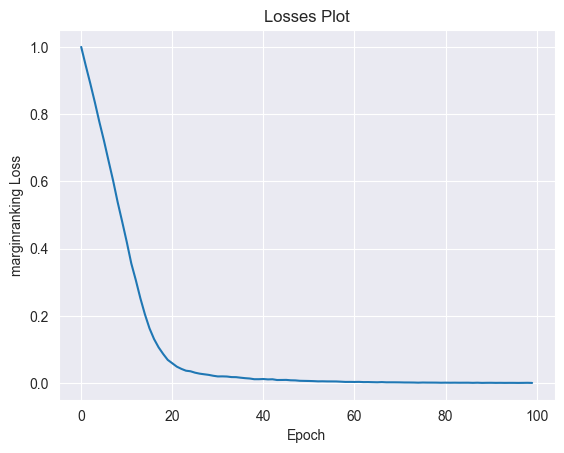

In [16]:
result.plot_losses()
plt.show()

In [17]:
df = result.metric_results.to_df()

metrics_of_interest = [
    "arithmetic_mean_rank",
    "inverse_arithmetic_mean_rank",
    "hits_at_1",
    "hits_at_3",
    "hits_at_5",
    "hits_at_10",
]

filtered_df = df.query(
    "Metric in @metrics_of_interest and Side == 'both' and Rank_type == 'realistic'"
)
filtered_df

,Side,Rank_type,Metric,Value
5,both,realistic,arithmetic_mean_rank,321.623383
59,both,realistic,inverse_arithmetic_mean_rank,0.003109
176,both,realistic,hits_at_1,0.297725
185,both,realistic,hits_at_3,0.658754
194,both,realistic,hits_at_5,0.751236
203,both,realistic,hits_at_10,0.797230


### Multi-class link prediction

The PyKEEN library provides several approaches for prediction. These approaches enable the identification of the top-K predicted links within the network or allow for more targeted predictions by specifying a particular head node and relationship type to evaluate potential novel connections.

In this example, the objective is to predict new fraudulent transfer relationships associated with a given client. As the graph mapping utilizes internal Neo4j node IDs, it is necessary to first query the database to obtain the corresponding node ID for the suspicious client. This ID is subsequently used as input for the prediction method to generate relevant link predictions.


<div style="
  background-color: #f7f2ff;
  color: #4b007d;
  border-left: 5px solid #8000ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin: 16px 0;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  📝 <strong>Quick Question:</strong>  
  <br><br>
  <strong>From looking at the Database, find the name of a money mule client.</strong>
</div>


<div style="
  border: 1px dashed #8000ff;
  background-color: #fdfbff;
  padding: 14px 18px;
  border-radius: 6px;
  font-family: monospace;
  width: 85%;
  color: #333;
">
<strong>Write your answer below:</strong>
<code></code>
</div>


In [18]:
# name = ...

**Possible Answer:**


In [19]:
name = "Gabriel Jenkins"

In [20]:
mule_id = run_query(
    """
    MATCH (c:Client)
    WHERE c.name = $name
    RETURN elementId(c) as id
    """,
    {"name": name},
)["id"][0]

In [21]:
predictions_df = (
    predict.predict_target(
        result.model,
        head=mule_id,
        relation="TRANSFER_TO",
        triples_factory=result.training,
    )
    .add_membership_columns(training=training, testing=testing, validation=validation)
    .df.sort_values(by="score", ascending=False)
)

In [22]:
predictions_df.head(5)

,tail_id,score,tail_label,in_training,in_testing,in_validation
1200,1200,-2.075722,4:a86637d1-a510-4629-9a21-54d6f5d853c7:316684,False,False,False
1166,1166,-2.104403,4:a86637d1-a510-4629-9a21-54d6f5d853c7:310877,False,False,False
1266,1266,-2.126689,4:a86637d1-a510-4629-9a21-54d6f5d853c7:320101,False,False,False
1108,1108,-2.154636,4:a86637d1-a510-4629-9a21-54d6f5d853c7:295187,False,False,False
1344,1344,-2.163152,4:a86637d1-a510-4629-9a21-54d6f5d853c7:324524,False,False,False


<div style="
  background-color: #f7f2ff;
  color: #4b007d;
  border-left: 5px solid #8000ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin: 16px 0;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  📝 <strong>Quick Question:</strong>  
  <br><br>
  <strong>Get the names of the top 5 predictions of the model.</strong>
</div>


<div style="
  border: 1px dashed #8000ff;
  background-color: #fdfbff;
  padding: 14px 18px;
  border-radius: 6px;
  font-family: monospace;
  width: 85%;
  color: #333;
">
<strong>Write your answer below:</strong>
<code></code>
</div>


In [23]:
# names = []
# index = 0
# while len(names) < 5 and index < 20:
#     fraudulent_id = predictions_df.iloc[index]["tail_label"]
#     name = run_query(
#         """
#         MATCH (c)
#         WHERE ...
#         RETURN ... AS name
#         """,
#         {...},
#     )["name"][0]

# if name:
#     names.append(name)
#     print(f"{index}: {name}")

#     index += 1

In [24]:
names = []
index = 0
while len(names) < 5 and index < 20:
    fraudulent_id = predictions_df.iloc[index]["tail_label"]
    name = run_query(
        """
        MATCH (c)
        WHERE elementId(c) = $id
        RETURN c.name AS name
        """,
        {"id": fraudulent_id},
    )["name"][0]

    if name:
        names.append(name)
        print(f"{index}: {name}")

    index += 1

0: Benjamin Morton
1: Allison Alvarez
2: Bailey Hoffman
3: Ryan Patel
4: Alexa Castillo


As you may have noticed, some of the predictions are not Clients, for which we know to be impossible, given the relationship we are trying to make inferences on `:TRANSFER_TO`. With that in mind, let's filter out the prediction that are not Clients:


In [25]:
client_df = run_query(
    """
    MATCH (n:Client)
    RETURN elementId(n) as nodeId, n.name AS name
    """
)

In [26]:
client_df.head(5)

,nodeId,name
0,4:a86637d1-a510-4629-9a21-54d6f5d853c7:0,Bentley Peck
1,4:a86637d1-a510-4629-9a21-54d6f5d853c7:5,Dominic Boyer
2,4:a86637d1-a510-4629-9a21-54d6f5d853c7:8,Faith Dotson
3,4:a86637d1-a510-4629-9a21-54d6f5d853c7:11,Landon Adams
4,4:a86637d1-a510-4629-9a21-54d6f5d853c7:14,Lauren Mack


In [27]:
merged_df = predictions_df.merge(
    client_df, left_on="tail_label", right_on="nodeId", how="left"
)
filtered_df = merged_df.dropna(subset=["name"])

### Store predictions back to Neo4j

For easier evaluation of the results, we will store the top five predictions back to Neo4j.


In [28]:
# Clear previous results if any
run_query(
    """
    MATCH (n)-[r:PREDICTED_TRANSFER_TO]->(c)
    WHERE elementId(n) = $id
    DELETE r
    """,
    {"id": mule_id},
)

""


In [29]:
candidate_nodes = (
    filtered_df[filtered_df["in_training"] == False].head(10)["tail_label"].to_list()
)

run_query(
    """
    MATCH (n)
    WHERE elementId(n) = $id
    UNWIND $candidates as ca
    MATCH (c)
    WHERE elementId(c) = ca
    MERGE (n)-[:PREDICTED_TRANSFER_TO]->(c);
    """,
    {"id": mule_id, "candidates": candidate_nodes},
)

""


<div style="
  background-color: #f7f2ff;
  color: #4b007d;
  border-left: 5px solid #8000ff;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin: 16px 0;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  📝 <strong>Quick Question:</strong>  
  <br><br>
  <strong>Query the Database to check your results.</strong>
</div>


<div style="
  border: 1px dashed #8000ff;
  background-color: #fdfbff;
  padding: 14px 18px;
  border-radius: 6px;
  font-family: monospace;
  width: 85%;
  color: #333;
">
<strong>Write your answer below:</strong>
<code></code>
</div>


**Answer:**

```sql
MATCH (s)-[:PREDICTED_TRANSFER_TO]->(t)
RETURN s, t
```


### Embeddings Visualization


<div style="
  background-color: #fffbe6;
  color: #8a6d3b;
  border-left: 5px solid #ffcc00;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin: 16px 0;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  <strong>⚠️ Note:</strong> PCA is not compatible with complex numbers. Since the embeddings from <code>RotatE</code> are complex-valued, we apply PCA only to their <strong>real part</strong> for visualization purposes.  <br><br>
  This is a simplification made to support interpretation during this workshop. Be aware that using only the real component may discard important information encoded in the imaginary part — especially in models like RotatE that rely on complex arithmetic.
</div>


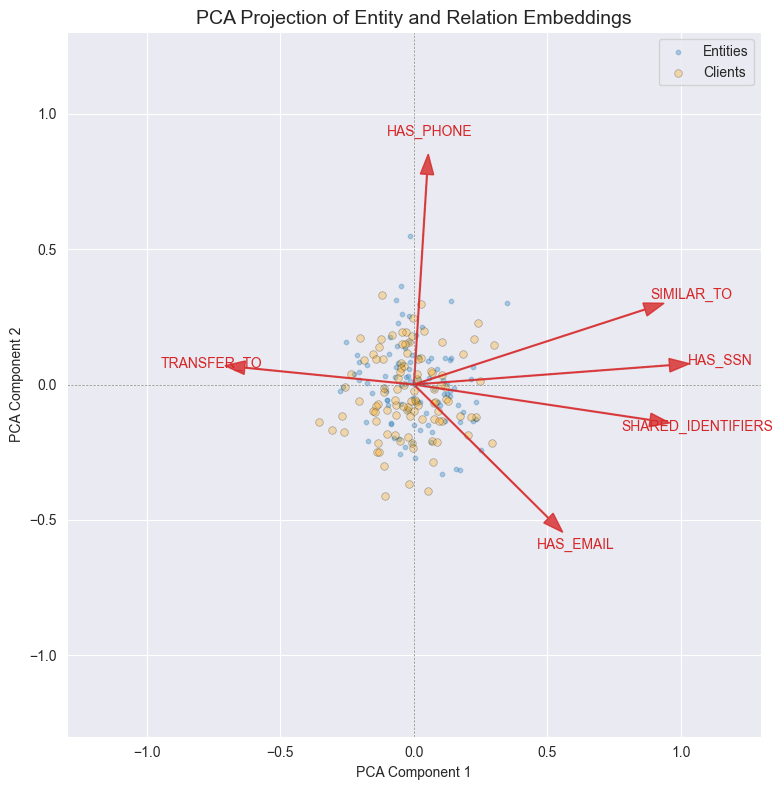

In [30]:
# --- PCA setup ---
pca = PCA(n_components=2)
entity_emb = model.entity_representations[0](indices=None).real.detach().numpy()
entity_proj = pca.fit_transform(entity_emb)

relation_emb = model.relation_representations[0](indices=None).real.detach().numpy()
relation_proj = pca.transform(relation_emb)

# --- Prepare client points ---
# Map client nodeIds to internal indices
client_indices = [
    tf.entity_to_id[node_id]
    for node_id in client_df["nodeId"]
    if node_id in tf.entity_to_id
]

# Get 2D projected coordinates for those clients
client_proj = entity_proj[client_indices]

# --- Plot setup ---
plt.figure(figsize=(8, 8))

max_dots = 100

# Plot all entities in blue
plt.scatter(
    entity_proj[:max_dots, 0],
    entity_proj[:max_dots, 1],
    alpha=0.3,
    s=10,
    label="Entities",
    color="tab:blue",
)

# Plot client entities in orange
plt.scatter(
    client_proj[:max_dots, 0],
    client_proj[:max_dots, 1],
    alpha=0.3,
    s=30,
    label="Clients",
    color="orange",
    edgecolor="black",
    linewidth=0.5,
)

# Plot relation vectors as arrows from origin
for i in tf.relation_id_to_label:
    x, y = relation_proj[i]
    plt.arrow(0, 0, x, y, color="tab:red", width=0.003, head_width=0.05, alpha=0.8)
    plt.text(
        x * 1.2,
        y * 1.2,
        tf.relation_id_to_label[i],
        color="tab:red",
        fontsize=10,
        ha="center",
        va="center",
    )

# --- Final touches ---
plt.axhline(0, color="gray", linestyle="--", linewidth=0.5)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.5)
plt.xlim(-1.3, 1.3)
plt.ylim(-1.3, 1.3)
plt.title("PCA Projection of Entity and Relation Embeddings", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 3. Graph Neural Networks


For this section, let's work on a different example. Create yet another Project, but this time let's use the Blank Sandbox - Graph Data Science template.

<div style="text-align: center; margin: 16px 0;">
   <img src="https://github.com/wliaw/2025-AAI-Summit-GraphDB/blob/main/imgs/Blank%20Sandbox.png?raw=true" alt="Neo4j Blank Sandbox - Graph Data Science" style="max-width: 600px; width: 100%; border-radius: 8px; box-shadow: 0 4px 12px rgba(0,0,0,0.15);">
   <p style="color: #555; font-size: 0.9em; margin-top: 8px;"><em>Neo4j Sandbox – Blank Sandbox Project Setup</em></p>
 </div>


<div style="
  background-color: #fffbe6;
  color: #8a6d3b;
  border-left: 5px solid #ffcc00;
  padding: 14px 18px;
  border-radius: 8px;
  font-size: 15px;
  width: 85%;
  margin: 16px 0;
  box-shadow: 0 1px 3px rgba(0,0,0,0.1);
">
  <strong>⚠️ Heads up:</strong> Don’t accidentally pick <em>Blank Sandbox</em> — it's easy to confuse with the correct option.<br><br>
  Make sure you choose <strong>Blank Sandbox – Graph Data Science</strong> for this exercise.
</div>


In [ ]:
import os
import zipfile
from collections import defaultdict
from urllib.request import urlretrieve

import pandas as pd
import torch
import torch.optim as optim
from graphdatascience import GraphDataScience
from neo4j import basic_auth
from torch_geometric.data import Data
from torch_geometric.nn import TransE
from tqdm.notebook import tqdm

In [ ]:
host = "bolt://44.222.222.70:7687"
user = "neo4j"
password = "segment-reservists-weapon"
gds = GraphDataScience(host, auth=basic_auth(user, password))

We will use **FB15k-237**, a filtered version of the FB15k dataset proposed by [(Bordes et al., 2013)](https://dl.acm.org/doi/10.5555/2999792.2999923), designed to remove highly redundant relations, following the approach of [(Toutanova and Chen, 2015)](https://aclanthology.org/W15-4007/).


In [ ]:
url = "https://download.microsoft.com/download/8/7/0/8700516A-AB3D-4850-B4BB-805C515AECE1/FB15K-237.2.zip"
raw_dir = "./data_from_zip"
os.makedirs(raw_dir, exist_ok=True)

zip_path = os.path.join(raw_dir, os.path.basename(url))
data_dir = os.path.join(raw_dir, "Release")
raw_file_names = ["train.txt", "valid.txt", "test.txt"]

# Download if missing
if not os.path.exists(zip_path):
    print("Downloading dataset...")
    urlretrieve(url, zip_path)
    print("Download complete.")
else:
    print("ZIP file already exists. Skipping download.")

# Extract if not already extracted
if not all(os.path.exists(os.path.join(data_dir, fname)) for fname in raw_file_names):
    print(f"Extracting {zip_path} to {raw_dir}...")
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        for filename in raw_file_names:
            zip_ref.extract(f"Release/{filename}", path=raw_dir)
    print("Extraction complete.")
else:
    print("Files already extracted. Skipping extraction.")

In [ ]:
gds.run_cypher("CREATE CONSTRAINT entity_id FOR (e:Entity) REQUIRE e.id IS UNIQUE")

In [ ]:
# Constants
rel_types = {
    "train.txt": "TRAIN",
    "valid.txt": "VALID",
    "test.txt": "TEST",
}

# Global mappings
rel_id_to_text_dict = {}
rel_type_dict = defaultdict(list)
rel_dict = {}


def process():
    """Processes raw triples into Neo4j nodes and relationships via GDS Cypher."""
    node_dict = {}
    for file_name in raw_file_names:
        file_path = os.path.join(data_dir, file_name)
        rel_type = rel_types[file_name]

        with open(file_path, "r") as f:
            lines = [line.strip().split("\t") for line in f if line.strip()]

        cypher_data = []
        for src, rel, dst in lines:
            # Create unique node IDs
            src_id = node_dict.setdefault(src, len(node_dict))
            dst_id = node_dict.setdefault(dst, len(node_dict))

            # Create unique relation ID
            rel_id = rel_dict.setdefault(rel, len(rel_dict))
            rel_id_to_text_dict[rel_id] = rel

            # Store for generic REL_ID cypher
            rel_type_dict[rel_id].append(
                {
                    "source": src_id,
                    "target": dst_id,
                }
            )

            # Store for TRAIN/VALID/TEST cypher
            cypher_data.append(
                {
                    "source": src_id,
                    "source_text": src,
                    "target": dst_id,
                    "target_text": dst,
                    "rel_id": rel_id,
                }
            )

        print(f"Writing {len(cypher_data)} entities of {rel_type}")
        gds.run_cypher(
            f"""
            UNWIND $ll as l
            MERGE (n:Entity {{id: l.source, text: l.source_text}})
            MERGE (m:Entity {{id: l.target, text: l.target_text}})
            MERGE (n)-[:{rel_type} {{rel_id: l.rel_id}}]->(m)
            """,
            params={"ll": cypher_data},
        )

    # Additional relation-type-specific edges (e.g. REL_0, REL_1, ...)
    print("Writing relationships as different relationship types")
    for rel_id, edges in tqdm(rel_type_dict.items()):
        rel_label = f"REL_{rel_id}"
        gds.run_cypher(
            f"""
            UNWIND $ll AS l
            MATCH (n:Entity {{id: l.source}}), (m:Entity {{id: l.target}})
            MERGE (n)-[:{rel_label} {{rel_id: $rel_id, text: $text}}]->(m)
            """,
            params={
                "ll": edges,
                "rel_id": rel_id,
                "text": rel_id_to_text_dict[rel_id],
            },
        )

In [ ]:
process()

Project all data in graph to get mapping between `id` and internal `nodeId` field from database.


In [ ]:
node_projection = {"Entity": {"properties": "id"}}
relationship_projection = [
    {"TRAIN": {"orientation": "NATURAL", "properties": "rel_id"}},
    {"TEST": {"orientation": "NATURAL", "properties": "rel_id"}},
    {"VALID": {"orientation": "NATURAL", "properties": "rel_id"}},
]

ttv_G, result = gds.graph.project(
    "fb15k-graph-ttv", node_projection, relationship_projection
)

In [ ]:
node_properties = gds.graph.nodeProperties.stream(
    ttv_G, ["id"], separate_property_columns=True
)

nodeId_to_id = dict(zip(node_properties.nodeId, node_properties.id))
id_to_nodeId = dict(zip(node_properties.id, node_properties.nodeId))

In [ ]:
def create_data_from_graph(relationship_type):
    rels_tmp = gds.graph.relationshipProperty.stream(ttv_G, "rel_id", relationship_type)
    topology = [
        rels_tmp.sourceNodeId.map(lambda x: nodeId_to_id[x]),
        rels_tmp.targetNodeId.map(lambda x: nodeId_to_id[x]),
    ]
    edge_index = torch.tensor(topology, dtype=torch.long)
    edge_type = torch.tensor(rels_tmp.propertyValue.astype(int), dtype=torch.long)
    data = Data(edge_index=edge_index, edge_type=edge_type)
    data.num_nodes = len(nodeId_to_id)
    display(data)
    return data

In [ ]:
train_tensor_data = create_data_from_graph("TRAIN")
test_tensor_data = create_data_from_graph("TEST")
val_tensor_data = create_data_from_graph("VALID")

In [ ]:
gds.graph.drop(ttv_G)

In [ ]:
def train_model_with_pyg(
    train_tensor_data, test_tensor_data, val_tensor_data, epoch_count=5
):
    device = "mps" if torch.mps.is_available() else "cpu"
    if device == "mps":
        print("Using Apple Silicon GPU")
    else:
        print("Using CPU")

    train_tensor_data = train_tensor_data.to(device)
    test_tensor_data = test_tensor_data.to(device)
    val_tensor_data = val_tensor_data.to(device)

    model = TransE(
        num_nodes=train_tensor_data.num_nodes,
        num_relations=train_tensor_data.num_edge_types,
        hidden_channels=50,
    ).to(device)

    loader = model.loader(
        head_index=train_tensor_data.edge_index[0],
        rel_type=train_tensor_data.edge_type,
        tail_index=train_tensor_data.edge_index[1],
        batch_size=1000,
        shuffle=True,
    )

    optimizer = optim.Adam(model.parameters(), lr=0.01)

    def train():
        model.train()
        total_loss = total_examples = 0
        for head_index, rel_type, tail_index in loader:
            optimizer.zero_grad()
            loss = model.loss(head_index, rel_type, tail_index)
            loss.backward()
            optimizer.step()
            total_loss += float(loss) * head_index.numel()
            total_examples += head_index.numel()
        return total_loss / total_examples

    @torch.no_grad()
    def test(data):
        model.eval()
        return model.test(
            head_index=data.edge_index[0],
            rel_type=data.edge_type,
            tail_index=data.edge_index[1],
            batch_size=1000,
            k=10,
        )

    for epoch in range(1, epoch_count + 1):
        loss = train()
        print(f"Epoch: {epoch:03d}, Loss: {loss:.4f}")
        if epoch % 75 == 0:
            rank, hits = test(val_tensor_data)
            print(
                f"Epoch: {epoch:03d}, Val Mean Rank: {rank:.2f}, "
                f"Val Hits@10: {hits:.4f}"
            )

    torch.save(model, f"./model_{epoch_count}.pt")

    mean_rank, mrr, hits_at_k = test(test_tensor_data)
    print(
        f"Test Mean Rank: {mean_rank:.2f}, Test Hits@10: {hits_at_k:.4f}, MRR: {mrr:.4f}"
    )

    return model

In [ ]:
model = train_model_with_pyg(train_tensor_data, test_tensor_data, val_tensor_data)

# The model can be loaded if it was trained before
# model = torch.load("./model_5.pt")

Extract node embeddings from the trained model and put them into database:


In [ ]:
embeddings = [
    {"id": i, "emb": model.node_emb.weight[i].tolist()}
    for i in range(len(nodeId_to_id))
]

gds.run_cypher(
    """
    UNWIND $rows AS row
    MATCH (n:Entity {id: row.id})
    SET n.emb = row.emb
    """,
    params={"rows": embeddings},
)

In [ ]:
relationship_to_predict = "/film/film/genre"
rel_id_to_predict = rel_dict[relationship_to_predict]
rel_label_to_predict = f"REL_{rel_id_to_predict}"

In [ ]:
G_test, result = gds.graph.project(
    "graph_to_predict_",
    {"Entity": {"properties": ["id", "emb"]}},
    rel_label_to_predict,
)

In [ ]:
def print_graph_info(G):
    print(f"Graph '{G.name()}' node count: {G.node_count()}")
    print(f"Graph '{G.name()}' node labels: {G.node_labels()}")
    print(f"Graph '{G.name()}' relationship types: {G.relationship_types()}")
    print(f"Graph '{G.name()}' relationship count: {G.relationship_count()}")

In [ ]:
print_graph_info(G_test)

In [ ]:
target_emb = model.node_emb.weight[rel_id_to_predict].tolist()
transe_model = gds.model.transe.create(
    G_test, "emb", {rel_label_to_predict: target_emb}
)

In [ ]:
source_node_list = ["/m/07l450", "/m/0ds2l81", "/m/0jvt9"]
source_ids_df = gds.run_cypher(
    """"
    UNWIND $node_text_list AS t
    MATCH (n:Entity) WHERE n.text=t
    RETURN id(n) as nodeId
    """,
    params={"node_text_list": source_node_list},
)

In [ ]:
result = transe_model.predict_stream(
    source_node_filter=source_ids_df.nodeId,
    target_node_filter="Entity",
    relationship_type=rel_label_to_predict,
    top_k=3,
    concurrency=4,
)
print(result)

In [ ]:
ids_in_result = pd.unique(pd.concat([result.sourceNodeId, result.targetNodeId]))

ids_to_text = gds.run_cypher(
    """
    UNWIND $ids AS id MATCH (n:Entity) WHERE id(n)=id RETURN id(n) AS nodeId, n.text AS tag, n.id AS id
    """,
    params={"ids": ids_in_result},
)

nodeId_to_text_res = dict(zip(ids_to_text.nodeId, ids_to_text.tag))
nodeId_to_id_res = dict(zip(ids_to_text.nodeId, ids_to_text.id))

result.insert(1, "sourceTag", result.sourceNodeId.map(lambda x: nodeId_to_text_res[x]))
result.insert(2, "sourceId", result.sourceNodeId.map(lambda x: nodeId_to_id_res[x]))
result.insert(4, "targetTag", result.targetNodeId.map(lambda x: nodeId_to_text_res[x]))
result.insert(5, "targetId", result.targetNodeId.map(lambda x: nodeId_to_id_res[x]))

In [ ]:
result

In [ ]:
write_relationship_type = "PREDICTED_" + rel_label_to_predict
result_write = transe_model.predict_write(
    source_node_filter=source_ids_df.nodeId,
    target_node_filter="Entity",
    relationship_type=rel_label_to_predict,
    write_relationship_type=write_relationship_type,
    write_property="transe_score",
    top_k=3,
    concurrency=4,
)

In [ ]:
gds.run_cypher(
    """
    MATCH (n)-[r:{write_relationship_type}]->(m)
    RETURN n.id AS sourceId, n.text AS sourceTag, m.id AS targetId, m.text AS targetTag, r.transe_score AS score
    """
)

In [ ]:
gds.graph.drop(G_test)

# 5. Large Language Models (LLMs)


<div style="
  background-color: #fffbe6;
  color: #8a6d3b;
  border-left: 5px solid #ffcc00;
  padding: 12px;
  margin-bottom: 16px;
  border-radius: 6px;
  white-space: pre-wrap;
  word-wrap: break-word;
  width: 80%;
">
  ⚠️ Planning on using Hugging Face API for reranking entities already ranked by previous models.
</div>
